Dieses Dokument ist ein sogenanntes "Jupyter Notebook". Dieses Format kann Quelltexte, Programmausgaben (Text und Bilder) und *formatierte* Dokumentation in einer Datei zusammenfassen und eigenet sich deshlab besonders für Forschung, Lehre und Dokumentation.

---

Wichtigste Kommandos (siehe auch "Help" → "Keyboard Shortcuts"):

- `Enter`: Zelle bearbeiten ("Edit mode", Zellernrahmen wird grün)
- `Esc`: Befehlsmodus ("Command mode", Zellenrahmen wird blau)
- `Shift+Enter`: Zelle ausführen und nächste aktivieren
- `A`: Neue Zelle über (**a**bove) aktueller einfügen
- `M`: Zellentyp = Markdown
- `Y`: Zellentyp = Code
- `H` bzw. `STRG+Shift+H`: Kurzbefehle anzeigen (siehe auch *Help*-Menü)




## Pytthon Grundlagen

In [1]:
# Freiraum zum interaktiven Ausprobieren von Python-Grundlagen

In [2]:
import numpy as np
import sympy as sp
from sympy.interactive import printing
printing.init_printing()
import matplotlib.pyplot as plt

%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
%matplotlib inline

# Datenvisualisierung

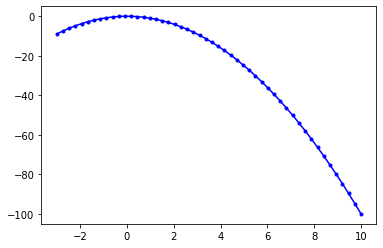

In [3]:
# Daten erzeugen
x = np.linspace(-3, 10, 50)
y = -x**2

# Daten plotten (blau, durchgezogene Linie, und Punktmarkierung)
plt.plot(x, y, "b.-")

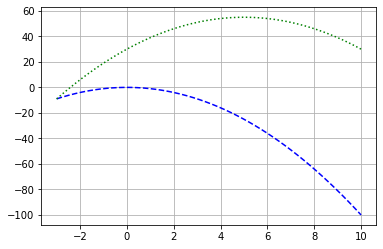

In [4]:
# Weitere Daten ins gleiche Diagramm plotten

# Neue daten Erzeugen
y2 = 10*x - x**2  + 30

# mit gepunkteten und gestrichtelten Linien
plt.plot(x, y, "b--")
plt.plot(x, y2, "g:")
plt.grid(1)


# Numerisches Rechnen (lineare Algebra)

Hier wird das Modul `numpy` benuzt. Siehe oben: `import numpy as np`.

In [5]:
# Definieren eines 2d-Arrays (3x3-Matrix)
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9.]]) ##:


# Elementweise Rechnungen

M1 = M * -10 ##:
M2 = M + 20 ##:
M3 = M**2 ##:


# Determinante

det_M = np.linalg.det(M) ##:

In [6]:
# Ein bestimmtes Element adressieren (Index-Zählung beginnt bei 0)

M[0, 0] ##:
M[1, 2] ##:

# bestimmtes Element verändern:

M[1, 2] = -5.123

M ##:

array([[ 1.   ,  2.   ,  3.   ],
       [ 4.   ,  5.   , -5.123],
       [ 7.   ,  8.   ,  9.   ]])

In [7]:
# Mehrere Elemente adressieren ("indizieren")

# oberen zwei Elemente der "ersten Spalete" (Index: 0)
M[0:2, 0:1] ##:


# erste Spalte (Index 0) mit -1 multiplizieren
M[:, 0]*=0.1

M ##:

# Matrix transponieren

Q = M.T ##:


array([[ 0.1  ,  0.4  ,  0.7  ],
       [ 2.   ,  5.   ,  8.   ],
       [ 3.   , -5.123,  9.   ]])

In [8]:
# Eigenwerte und Eigenvektoren bestimmen

np.set_printoptions(linewidth=270, precision=8)
eigvals, eigvects = np.linalg.eig(M)

eigvals ##:
eigvects ##:

array([[ 0.99657488+0.j        , -0.23614565+0.03815468j, -0.23614565-0.03815468j],
       [-0.08259563+0.j        ,  0.20236457-0.56853971j,  0.20236457+0.56853971j],
       [-0.00405789+0.j        , -0.76065145+0.j        , -0.76065145-0.j        ]])

**Beobachtung**: Es resultieren 1 reeller Eigenwert und zwei komplexe (d.h. ein konjugiert komplexes Paar).

Nebenbemerkung zu komplexen Zahlen: Die "imaginäre Einheit" $i$ bzw. in der Elektrotechnik meist $j$ ist definiert über die Gleichung

$$
j^2 = j\cdot j= -1.
$$

Eine komplexe Zahl $z$ ist die Summe $z = a + b \cdot j$ mit $a, b \in \mathbb{R}$ (reelle Zahlen). In Python schreibt man z.B. `z = -4 + 3j`.

In [9]:
# 1. Wert
w0 = eigvals[0] ##

# 1. Spalte (-> wird ein 1d-array)
v0 = eigvects[:, 0] ##:

array([ 0.99657488+0.j, -0.08259563+0.j, -0.00405789+0.j])

In [10]:
# Matrix-Vektor-Multiplikation:

M@v0 ##:

# Alternative Notation (rückwärtskompatibel)

np.dot(M, v0) ##:


array([-0.07770743+0.j,  0.00644035+0.j,  0.00031641+0.j])

In [11]:
# Prüfen, ob w0 bzw. v0 wirklich Eigenwert bzw. Eigenvektor ist von M ist

w0*v0 ##:

# Es kommt das gleiche Ergebnis wie oben raus (bis auf "numerisches Rauschen"):
diff = w0*v0 - M@v0 ##:


array([-5.55111512e-17+0.j, -7.89299182e-17-0.j, -1.62034015e-16-0.j])

In [12]:
# Aufspalten in Real- und Imaginärteil

eigvals ##:

np.real(eigvals) ##:
np.imag(eigvals) ##:

array([ 0.        ,  5.94439065, -5.94439065])

# Symbolisches Rechnen

Hier wird das Modul `sympy` benuzt. Siehe oben: `import sympy as sp`.

In [13]:
x1, x2, a = sp.symbols("x1, x2, a")

f = x1**5 - 270*x1**2 + 2*a*x1 + 4 ##:

In [14]:
# 1. Ableitung
df1 = f.diff(x1)

In [15]:
# 2. Ableitung
f.diff(x1, 2) 

In [16]:
# 2. Ableitung (ausmultipliziert)
df2 = f.diff(x1, 2) .expand()

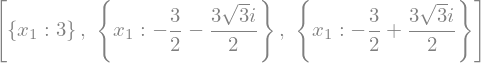

In [17]:
asol  = sp.solve(df2, x1, dict=True) ##: